In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

file_path = 'student_performance.csv' 
data = pd.read_csv(file_path)
print(data)

data = data.drop(columns=['StudentID', 'Name'])
print(data)


   StudentID      Name  Gender  AttendanceRate  StudyHoursPerWeek  \
0          1      John    Male              85                 15   
1          2     Sarah  Female              90                 20   
2          3      Alex    Male              78                 10   
3          4   Michael    Male              92                 25   
4          5      Emma  Female              88                 18   
5          6    Olivia  Female              95                 30   
6          7    Daniel    Male              70                  8   
7          8    Sophia  Female              85                 17   
8          9     James    Male              82                 12   
9         10  Isabella  Female              91                 22   

   PreviousGrade  ExtracurricularActivities ParentalSupport  FinalGrade  
0             78                          1            High          80  
1             85                          2          Medium          87  
2             65  

In [2]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['ParentalSupport'] = label_encoder.fit_transform(data['ParentalSupport'])  

X = data.drop(columns=['FinalGrade'])  
y = data['FinalGrade']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")



Mean Squared Error (MSE): 2.2402948293779494
Root Mean Squared Error (RMSE): 1.4967614470509152
R² Score: 0.9601725363666143


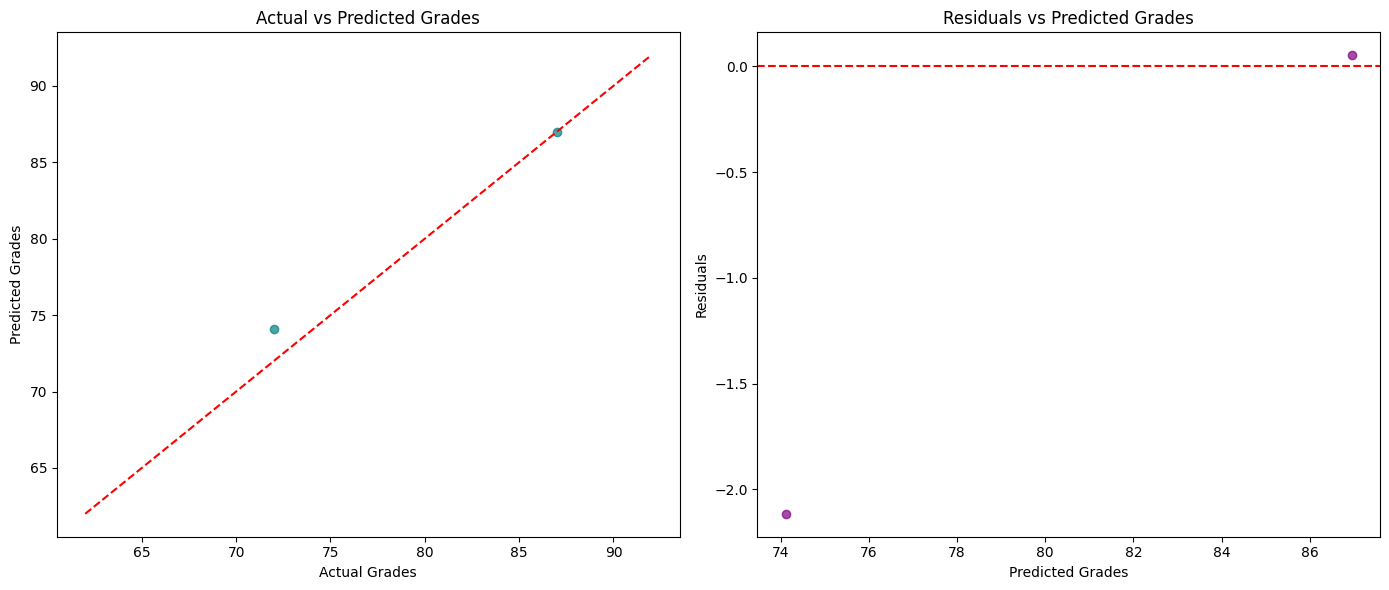

In [3]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color="purple")
plt.axhline(y=0, color="red", linestyle="--")  
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Grades")


plt.tight_layout()
plt.show()